# 大宗商品投资研究

- 作者：DGC'Idea
- 版本：V0.1   
- 更新日期：2018年2月5日

----------

- 跟踪标的：comex黄金、comex白银、伦敦金、伦敦银、NYMEX原油、布伦特原油；
- 数据源：新浪财经；
- 分析结果：估值表、估值图表、金银比、金油比。

In [7]:
#到入库
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt  

import os

#引入自定义库
import sys
sys.path.append('../PF')
from pf_cmm import Cmm

cmm=Cmm('csv','../Data/')

In [6]:
import matplotlib
print(matplotlib.get_cachedir())

C:\Users\zl\.matplotlib


## 1.获取数据

In [31]:
#更新商品数据
cmm.data.update(cmm.pool.track)
cmm.value.update(cmm.pool.track,[10],True)
cmm.change.update(cmm.pool.track,['close'],True)

数据分析：布伦特原油，[ 收盘价格 ] 数据

ValueError: 'usecols' must either be list-like of all strings, all unicode, all integers or a callable.

## 2.价格分析

- 百分位：为时间窗内小于当前值的样本个数与总体样本个数的比率，代表当前值在历史统计值的估值位置；
- 区　间：按百分位分为七个区间：极高(>90%)，较高(80%~90%)，偏高(60%~80%)，正常(40%~60%)，偏低(20%~40%)，较低(10%~20%)，极低(<10%)；
- 最小值：是统计时间窗内指数的理论最小值，表示其值下限；
- 最大值：是统计时间窗内指数的理论最大值，表示其值上限；

In [32]:
df=cmm.value.table.show()
df

AttributeError: 'DataFrame' object has no attribute 'sort'

## 2.涨跌分析

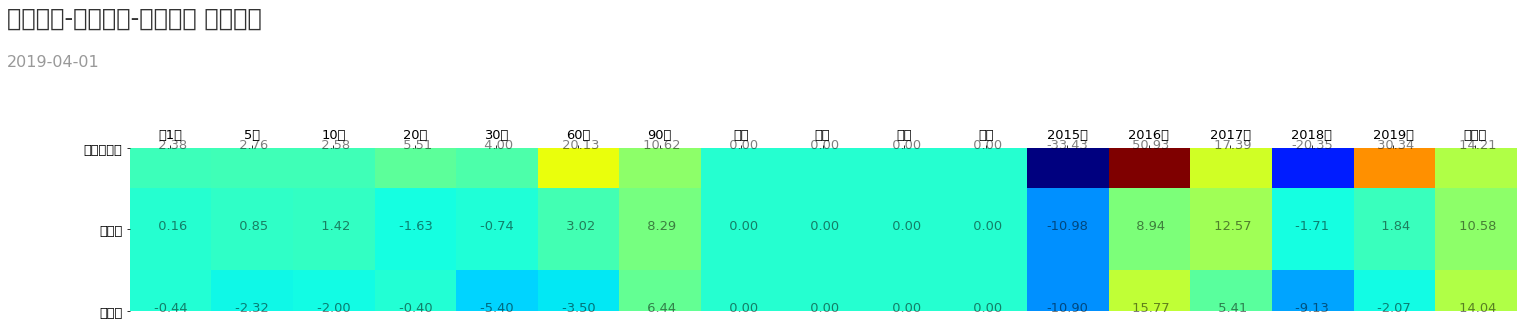

In [8]:
fig=cmm.change.chart.heat(cmm.pool.track,item='close',cols=[],title='大宗商品-阶段涨跌')


## 3.金银比

金银价格长期看有极强的正相关。
- 金价上涨，银价大概率涨更多；金价持平，银价大概率上涨。
- 金价小跌，银价大概率持平或小涨；金价大跌，银价大概率持平或小跌。

金银比是指一盎司的黄金与一盎司的白银价格之间的比率。
- 高于70：银价低估，优先建仓白银；高于80：银价严重低估，加速建仓白银。
- 低于55：金价低估，优先建仓黄金；低于45，金价严重低估，加速建仓黄金。
- 55-70之间：金银比属合理区间，根据金银价格决定是否投资。
 
整体而言，会呈现出以下规律，即经济处于衰退周期，白银的下跌比黄金来得迅速，反之，经济处于上升周期，白银的上升也会比黄金来得快。比值越高代表着经济越不稳定。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12289 missing from c

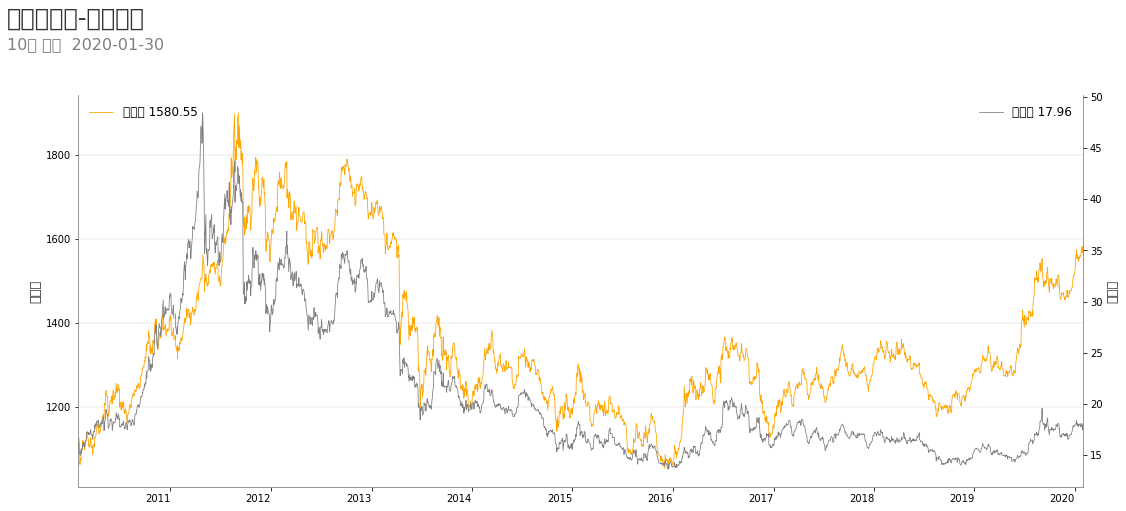

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 24403 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:90: RuntimeWarning: Glyph 20110 missing from current font.
  font.set_text

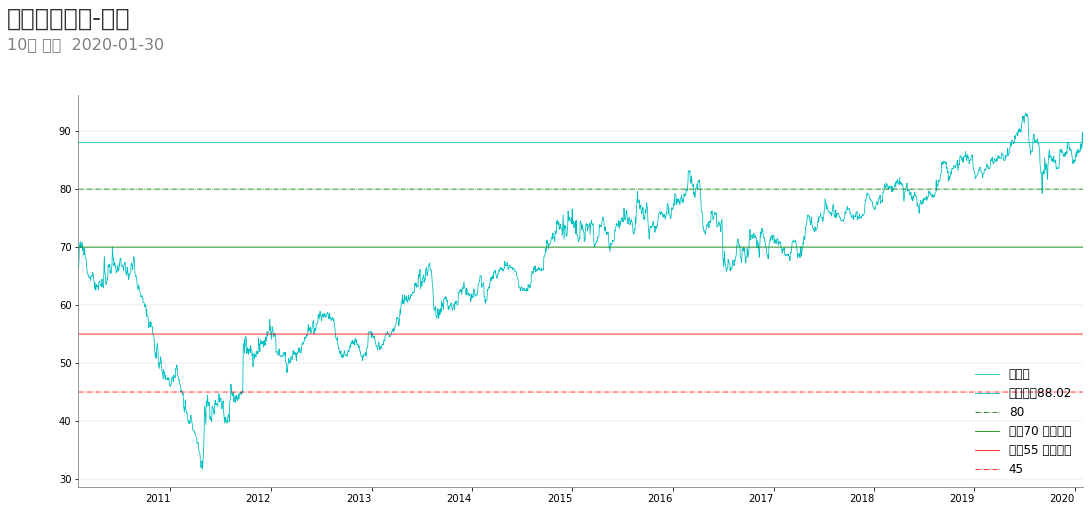

In [4]:
cmm.value.chart.compar(['XAU','XAG'],title='金、银价格')
cmm.value.chart.gsr()

## 4.金油比

金油比是指黄金价格与原油价格的比值。
- 比例越低，意味着金价上涨或油价下跌可能性越高；
- 比例越高，则表示金价下跌或者油价上涨的可能性越高。
 
金油比可以视作风险结构变化的前瞻指标，反应了市场对经济风险和地缘政治风险的敏感性差异，每一次金油比高于30之后，都发生了经济风险向地缘政治风险重心转移的大事件。

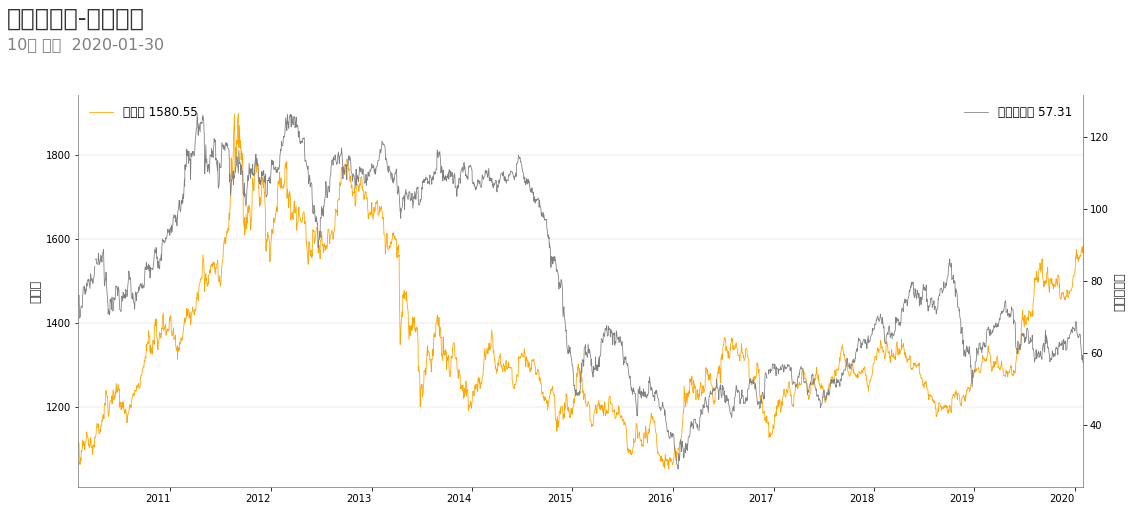

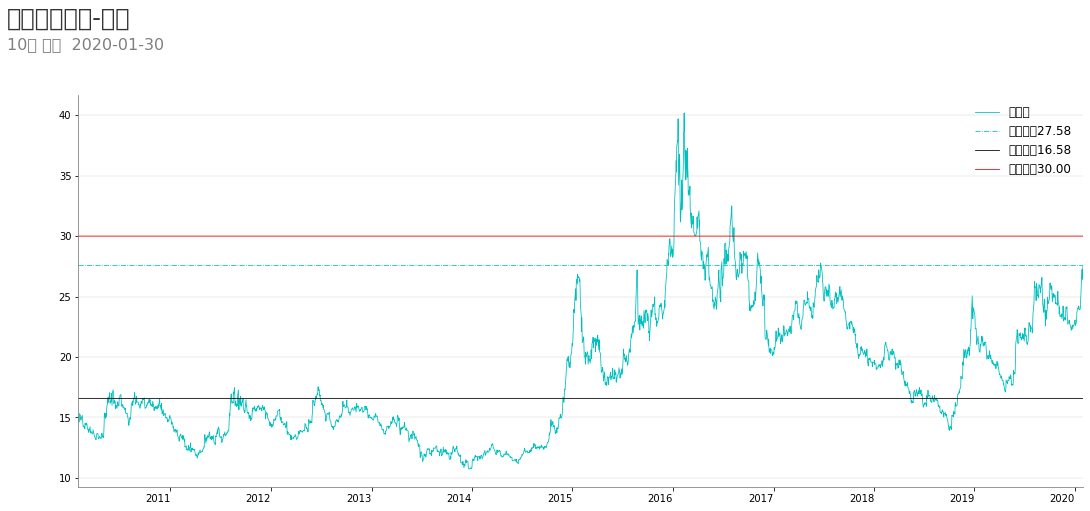

In [20]:
cmm.value.chart.compar(['XAU','OIL'],title='金、油价格')
cmm.value.chart.gor()

## 5.价格走势图

../PF\pf_cmm.py:209: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  val_q20=table.ix[code,item+'_q20']
../PF\pf_cmm.py:210: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  val_q50=table.ix[code,item+'_q50']
../PF\pf_cmm.py:211: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  val_q80=table.ix[code,item+'_q80']


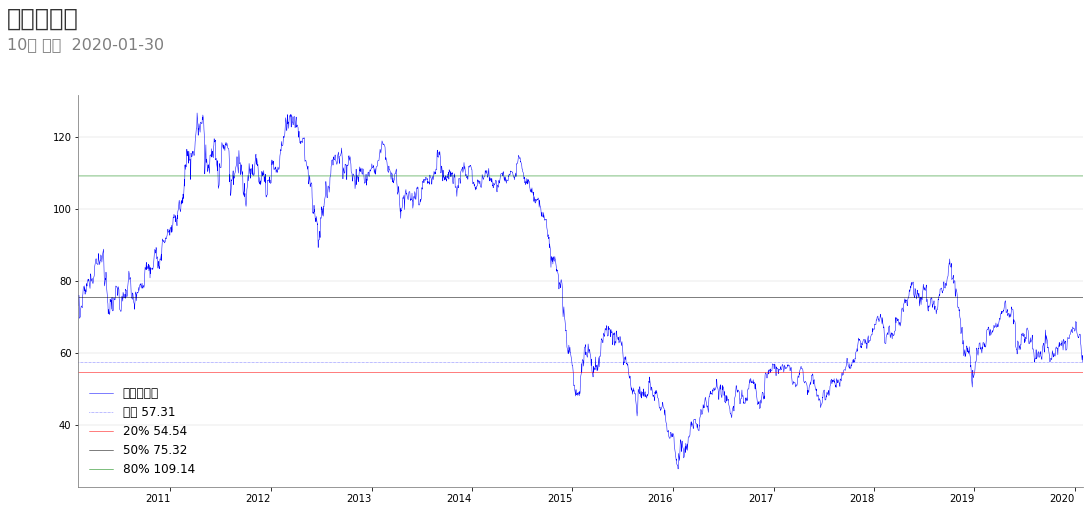

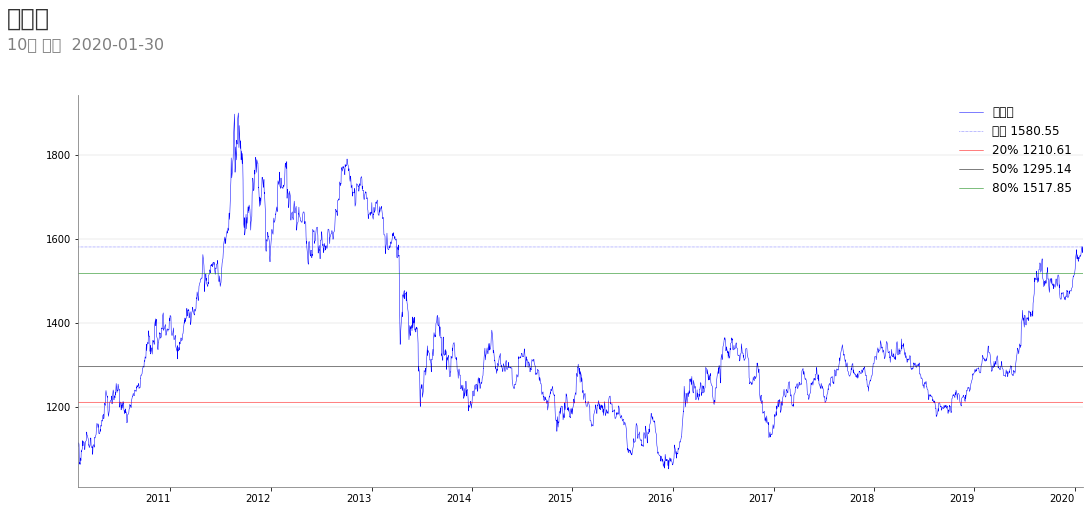

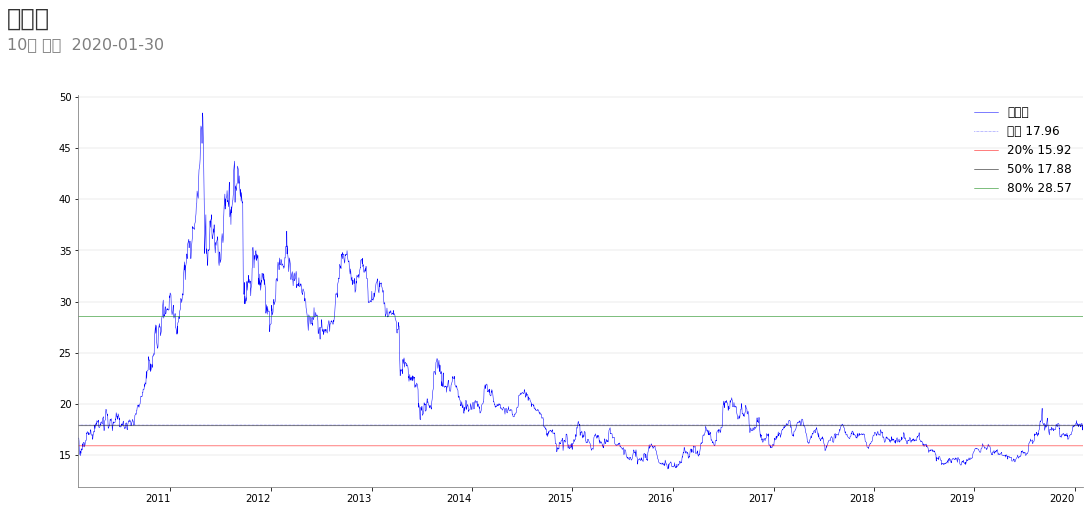

In [21]:
cmm.value.chart.line(cmm.pool.track)

## 6.生成标的

In [4]:
pool={
    'XAU':u'伦敦金',
    'XAG':u'伦敦银',
    'OIL':u'布伦特原油'
    }

cmm.pool.create(pool)
cmm.pool.track

{'OIL': u'\u5e03\u4f26\u7279\u539f\u6cb9',
 'XAG': u'\u4f26\u6566\u94f6',
 'XAU': u'\u4f26\u6566\u91d1'}